<a href="https://colab.research.google.com/github/codeso522/NLP/blob/master/classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [0]:
len(train_data)

8982

In [0]:
len(test_data)

2246

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train,partial_y_train,epochs=12,batch_size=512,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/12
7982/7982 [==============================] - 1s 121us/step - loss: 0.0942 - accuracy: 0.9604 - val_loss: 1.2108 - val_accuracy: 0.7950
Epoch 2/12
7982/7982 [==============================] - 1s 120us/step - loss: 0.0955 - accuracy: 0.9592 - val_loss: 1.3200 - val_accuracy: 0.7820
Epoch 3/12
7982/7982 [==============================] - 1s 119us/step - loss: 0.0948 - accuracy: 0.9590 - val_loss: 1.2273 - val_accuracy: 0.8030
Epoch 4/12
7982/7982 [==============================] - 1s 119us/step - loss: 0.0933 - accuracy: 0.9597 - val_loss: 1.1916 - val_accuracy: 0.8010
Epoch 5/12
7982/7982 [==============================] - 1s 118us/step - loss: 0.0910 - accuracy: 0.9594 - val_loss: 1.2979 - val_accuracy: 0.7940
Epoch 6/12
7982/7982 [==============================] - 1s 121us/step - loss: 0.0923 - accuracy: 0.9605 - val_loss: 1.2894 - val_accuracy: 0.7970
Epoch 7/12
7982/7982 [==============================] - 1s 119us/step - loss

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

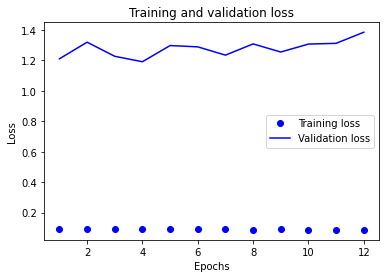

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

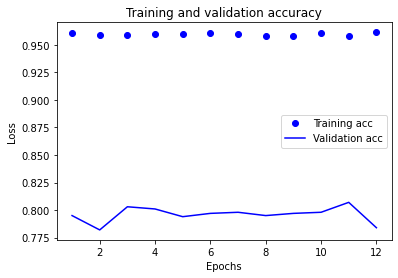

In [0]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 86us/step


[1.5354949024672606, 0.7689225077629089]

In [0]:
predictions = model.predict(x_test)
#Each entry in predictions is a vector of length 46:
predictions[0].shape


(46,)

In [0]:
#The coefficients in this vector sum to 1:
np.sum(predictions[0])


1.0000001

In [0]:
#The largest entry is the predicted class—the class with the highest probability:
 np.argmax(predictions[0])

3

Different way to handle labels and the loss

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
#loss func changed
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [0]:
history = model.fit(partial_x_train,partial_y_train,epochs=12,batch_size=512,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/12
7982/7982 [==============================] - 1s 125us/step - loss: 0.1066 - acc: 0.9567 - val_loss: 1.4188 - val_acc: 0.7820
Epoch 2/12
7982/7982 [==============================] - 1s 117us/step - loss: 0.0820 - acc: 0.9600 - val_loss: 1.3959 - val_acc: 0.7840
Epoch 3/12
7982/7982 [==============================] - 1s 116us/step - loss: 0.0794 - acc: 0.9589 - val_loss: 1.4088 - val_acc: 0.7890
Epoch 4/12
7982/7982 [==============================] - 1s 116us/step - loss: 0.0784 - acc: 0.9579 - val_loss: 1.4242 - val_acc: 0.7820
Epoch 5/12
7982/7982 [==============================] - 1s 116us/step - loss: 0.0791 - acc: 0.9592 - val_loss: 1.4199 - val_acc: 0.7880
Epoch 6/12
7982/7982 [==============================] - 1s 116us/step - loss: 0.0787 - acc: 0.9577 - val_loss: 1.4238 - val_acc: 0.7900
Epoch 7/12
7982/7982 [==============================] - 1s 118us/step - loss: 0.0761 - acc: 0.9600 - val_loss: 1.5294 - val_acc: 0.7860


In [0]:
results = model.evaluate(x_test,y_test)
results

2246/2246 [==============================] - 0s 85us/step


[1.7375989202293878, 0.7666963338851929]